In [23]:
import pandas as pd
import numpy as np
from collections import Counter

# Import Data

In [9]:
news_df = pd.read_csv('./intermed/news.csv')

In [10]:
puretext = news_df.puretext.values

In [11]:
news_df.head(2)

,Unnamed: 0,title,text,subject,date,label,cleantext,source,puretext,puretitle,puretext_wpunc,puretitle_wpunc
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,The head of a conservative Republican faction ...,WASHINGTON (Reuters),the head of a conservative republican faction ...,as us budget fight looms republicans flip thei...,the head of a conservative republican faction ...,"as u.s. budget fight looms, republicans flip t..."
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,Transgender people will be allowed for the fir...,WASHINGTON (Reuters),transgender people will be allowed for the fir...,us military to accept transgender recruits on ...,transgender people will be allowed for the fir...,u.s. military to accept transgender recruits o...


In [116]:
# # remove punctuation and tokenize
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [117]:
# # clean to tokenize text and title
# tokenizer_nltk = nltk.RegexpTokenizer(r"\w+")
# news_df['texttoken'] = news_df['puretext'].apply(lambda x: tokenizer_nltk.tokenize(x))
# news_df['titletoken'] = news_df['title'].apply(lambda x: tokenizer_nltk.tokenize(x))

# Count Number of Words

In [12]:
def numUniqueWords(text):
    return len(Counter(text.split()))

def numWords(text):
    return len(text)

In [13]:
numUniqueWords(puretext[0]), numWords(puretext[0])

(381, 4521)

In [14]:
news_df['numUniqueWords'] = news_df['puretext'].apply(lambda x: numUniqueWords(x))
news_df['numWords'] = news_df['puretext'].apply(lambda x: numWords(x))
news_df['percUniqueWords'] = news_df['numUniqueWords']/news_df['numWords']

In [15]:
word_counts = news_df.groupby('label').sum()
word_counts.rename(columns={'Unnamed: 0': 'total'})

,total,numUniqueWords,numWords,percUniqueWords
label,,,,
fake,778559517,5137639,58428186,2271.417198
true,229333236,4398683,49522487,2114.256505


In [16]:
news_df.groupby('label').median()

,Unnamed: 0,numUniqueWords,numWords,percUniqueWords
label,,,,
fake,33157,205,2116,0.095842
true,10708,200,2156,0.094604


In [17]:
import matplotlib.pyplot as plt
# https://matplotlib.org/3.1.1/gallery/statistics/histogram_multihist.html

In [18]:
news_df.percUniqueWords.size

44898

In [19]:
# set for histograms
percUniqueWords = news_df.percUniqueWords.values
labels = news_df.label.values
y = np.zeros(labels.shape)
y[labels == 'fake'] = 1

percUniqueWordsList = []
percUniqueWordsTrue = percUniqueWords[labels=="true"]
percUniqueWordsFake = percUniqueWords[labels=="fake"]
percUniqueWordsList.append(percUniqueWordsTrue)
percUniqueWordsList.append(percUniqueWordsFake)

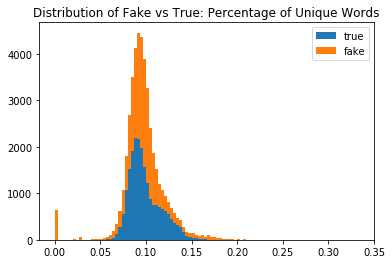

In [20]:
# plot histogram
n_bins = 100

# stacked bar
plt.hist(percUniqueWordsList, n_bins, density=False, histtype='bar', stacked=True, 
         label=['true','fake'])

plt.title('Distribution of Fake vs True: Percentage of Unique Words')
plt.legend()

plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [26]:
def lrModelEval(X, y, test_perc):
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=test_perc, random_state=42)
    
    clf = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, y_train)
    
    # predict
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    assert(y_pred_train.shape == y_train.shape)
    assert(y_pred_test.shape == y_test.shape)
    
    # evaluate
    
    print('training accuracy:', clf.score(X_train, y_train))
    print('test accuracy:', clf.score(X_test, y_test))
    print('train f-score:', f1_score(y_train, y_pred_train))
    print('test f-score:', f1_score(y_test, y_pred_test))
    
    return clf

In [27]:
lrModelEval(percUniqueWords, y, 0.33)

training accuracy: 0.5242511884578305
test accuracy: 0.5192684079098333
train f-score: 0.6699720960265664
test f-score: 0.6655397473822604


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)